In [12]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [79]:
hdu1 = fits.open('/Users/hph/current_fits/misc/PPMAP_l000_temp.fits')[0]
hdu2 = fits.open('/Users/hph/cmzoom_catalog/catalog_acc/herschel_temperature_conv36.fits')[0]
hdu3 = fits.open('/Users/hph/cmzoom_catalog/catalog_acc/mask_new_sgrc.fits')[0]

In [92]:
from reproject import reproject_interp
array, footprint = reproject_interp(hdu2, hdu1.header)
marray, mfootprint = reproject_interp(hdu3, hdu1.header)
marray[np.isnan(marray)]=1000
marray[marray!=1000]=1
marray[marray==1000]=0

In [11]:
fits.writeto('/Users/hph/current_fits/misc/herschel_to_ppmap_reprojected.fits', array, hdu1.header, overwrite=True)

In [93]:
len(marray[marray==0]), len(marray[marray!=0])

(2039370, 34230)

(10, 40)

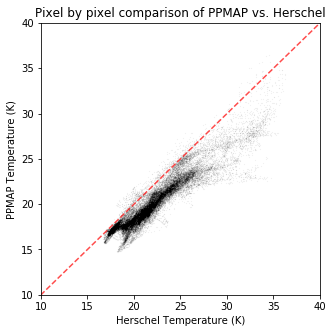

In [98]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))
cond = (marray!=0)
ax.scatter(array[cond].flatten(),hdu1.data[cond].flatten(),s=0.2,alpha=0.1,color='k',marker='.')
ax.plot([0,100],[0,100],color='red',ls='--',alpha=0.7)
ax.set_xlabel('Herschel Temperature (K)')
ax.set_ylabel('PPMAP Temperature (K)')
ax.set_title('Pixel by pixel comparison of PPMAP vs. Herschel')
ax.set_xlim(10,40)
ax.set_ylim(10,40)

(10, 40)

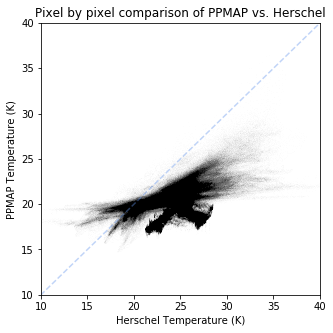

In [21]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))
ax.scatter(array.flatten(),hdu1.data.flatten(),s=0.2,alpha=0.01,color='k',marker='.')
ax.plot([0,100],[0,100],color='cornflowerblue',ls='--',alpha=0.4)
ax.set_xlabel('Herschel Temperature (K)')
ax.set_ylabel('PPMAP Temperature (K)')
ax.set_title('Pixel by pixel comparison of PPMAP vs. Herschel')
ax.set_xlim(10,40)
ax.set_ylim(10,40)

In [53]:
print(np.histogram(hdu1.data.flatten(),bins=bins)[0])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     2     4     6     6     6    11
    10     9    11    11    16    10    13    13    19    20    20    33
    52    53    48    54    56    65    76    74    88   106    88   117
   136   180   271   392   429   611   868  1442  2234  3211  4746  6871
  9865 13406 14670 15456 15955 14726 13585 13261 13829 14486 14999 15087
 15276 14861 14915 14714 15124 15280 16415 17201 18272 19158 20058 20978
 21758 23508 25934 27325 27225 25817 25418 25191 26253 27057 27169 28609
 29742 31306 31310 31197 31448 32127 31840 31438 31

In [56]:
bins = np.linspace(10,40,500)
comp_hist = np.histogram2d(array.flatten(),hdu1.data.flatten(),bins=bins)[0]

In [60]:
X,Y = np.meshgrid(bins[:-1],bins[:-1])

(13, 35)

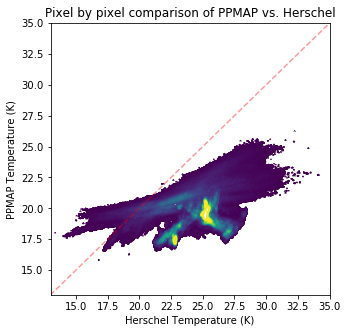

In [77]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))
ax.contour(X,Y,comp_hist.T,levels=np.logspace(1,3,100))
ax.plot([0,100],[0,100],color='red',ls='--',alpha=0.4)
ax.set_xlabel('Herschel Temperature (K)')
ax.set_ylabel('PPMAP Temperature (K)')
ax.set_title('Pixel by pixel comparison of PPMAP vs. Herschel')
ax.set_xlim(13,35)
ax.set_ylim(13,35)

In [44]:
comp_hist[0].shape

(499, 499)

In [109]:
bins = np.linspace(10,40,100)
comp_hist = np.histogram2d(array[cond].flatten(),hdu1.data[cond].flatten(),bins=bins)[0]
X,Y = np.meshgrid(bins[:-1],bins[:-1])

Text(0.5, 1.0, 'Counts')

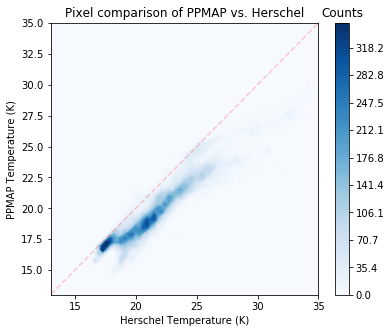

In [138]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6,5))
cntr = ax.contourf(X,Y,comp_hist.T,levels=np.linspace(0,350,100),cmap=plt.cm.Blues)
ax.plot([0,100],[0,100],color='red',ls='--',alpha=0.2)
ax.set_xlabel('Herschel Temperature (K)')
ax.set_ylabel('PPMAP Temperature (K)')
ax.set_title('Pixel comparison of PPMAP vs. Herschel')
ax.set_xlim(13,35)
ax.set_ylim(13,35)
cbar = plt.colorbar(cntr)
cbar.ax.set_title('Counts')